In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = pd.read_csv('cards.csv')
path_df = pd.DataFrame(path)

path_df[:5]

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [4]:
grouped_card_type = path_df['card type']
grouped_card_type.value_counts()

jack     711
queen    665
ace      642
eight    624
five     622
ten      619
six      616
two      613
four     605
nine     580
seven    580
king     579
three    574
xxx      125
Name: card type, dtype: int64

In [5]:
grouped_labels = path_df['labels']
grouped_labels.value_counts()

ace of spades        191
jack of spades       182
ace of hearts        181
jack of clubs        181
jack of hearts       178
seven of spades      175
queen of diamonds    173
queen of spades      172
queen of clubs       171
jack of diamonds     170
eight of diamonds    169
ten of spades        168
six of spades        168
five of spades       168
four of clubs        167
two of spades        165
two of hearts        165
four of hearts       164
nine of spades       164
three of diamonds    163
eight of hearts      162
six of clubs         162
ten of diamonds      161
king of spades       161
five of clubs        160
seven of hearts      153
three of spades      152
ten of clubs         151
four of spades       150
queen of hearts      149
six of diamonds      149
five of diamonds     148
eight of clubs       148
five of hearts       146
king of diamonds     145
eight of spades      145
nine of hearts       143
two of diamonds      143
two of clubs         140
ten of hearts        139


In [13]:
#count number each suite

heart = 0
spade = 0
club = 0
diamond = 0
joker = 0
for file in path_df['filepaths']:
    if 'hearts' in file:
        heart += 1
    elif 'spades' in file:
        spade += 1
    elif 'clubs' in file:
        club += 1
    elif 'diamonds' in file:
        diamond += 1
    elif 'joker' in file:
        joker += 1
        

print(f'heart {heart}')
print(f'spade {spade}')
print(f'club {club}')
print(f'diamond {diamond}')
print(f'joker {joker}')

heart 1975
spade 2161
club 1937
diamond 1957
joker 125


In [15]:
#count number each suite in train

def display_counts(path):
    heart = 0
    spade = 0
    club = 0
    diamond = 0
    joker = 0
    for file in path_df['filepaths']:
        if 'hearts' in file and path in file:
            heart += 1
        elif 'spades' in file and path in file:
            spade += 1
        elif 'clubs' in file and path in file:
            club += 1
        elif 'diamonds' in file and path in file:
            diamond += 1
        elif 'joker' in file and path in file:
            joker += 1

    print(f'heart {heart}')
    print(f'spade {spade}')
    print(f'club {club}')
    print(f'diamond {diamond}')
    print(f'joker {joker}')

In [16]:
#count number each suite in train
print('Training Dataset Counts')
train_counts = display_counts('train')
print('\n------------------ \n')


print('Testing Dataset Counts')
test_counts = display_counts('test')
print('\n------------------ \n')

print('Validation Dataset Counts')
validation_counts = display_counts('valid')
print('\n------------------ \n')



Training Dataset Counts
heart 1845
spade 2031
club 1807
diamond 1827
joker 115

------------------ 

Testing Dataset Counts
heart 65
spade 65
club 65
diamond 65
joker 5

------------------ 

Validation Dataset Counts
heart 65
spade 65
club 65
diamond 65
joker 5

------------------ 



In [29]:
one_of_each = []
joker = []
for img in path_df['filepaths']:
    if '001.jpg' in img and 'joker' not in img:
        one_of_each.append(img)
    elif '001.jpg' in img and 'joker' in img:
        joker.append(img)
print(len(one_of_each))
print(len(joker))

52
1


In [30]:
suites = np.array(one_of_each).reshape(13, 4)
row, col = suites.shape
row

13

<Figure size 640x480 with 0 Axes>

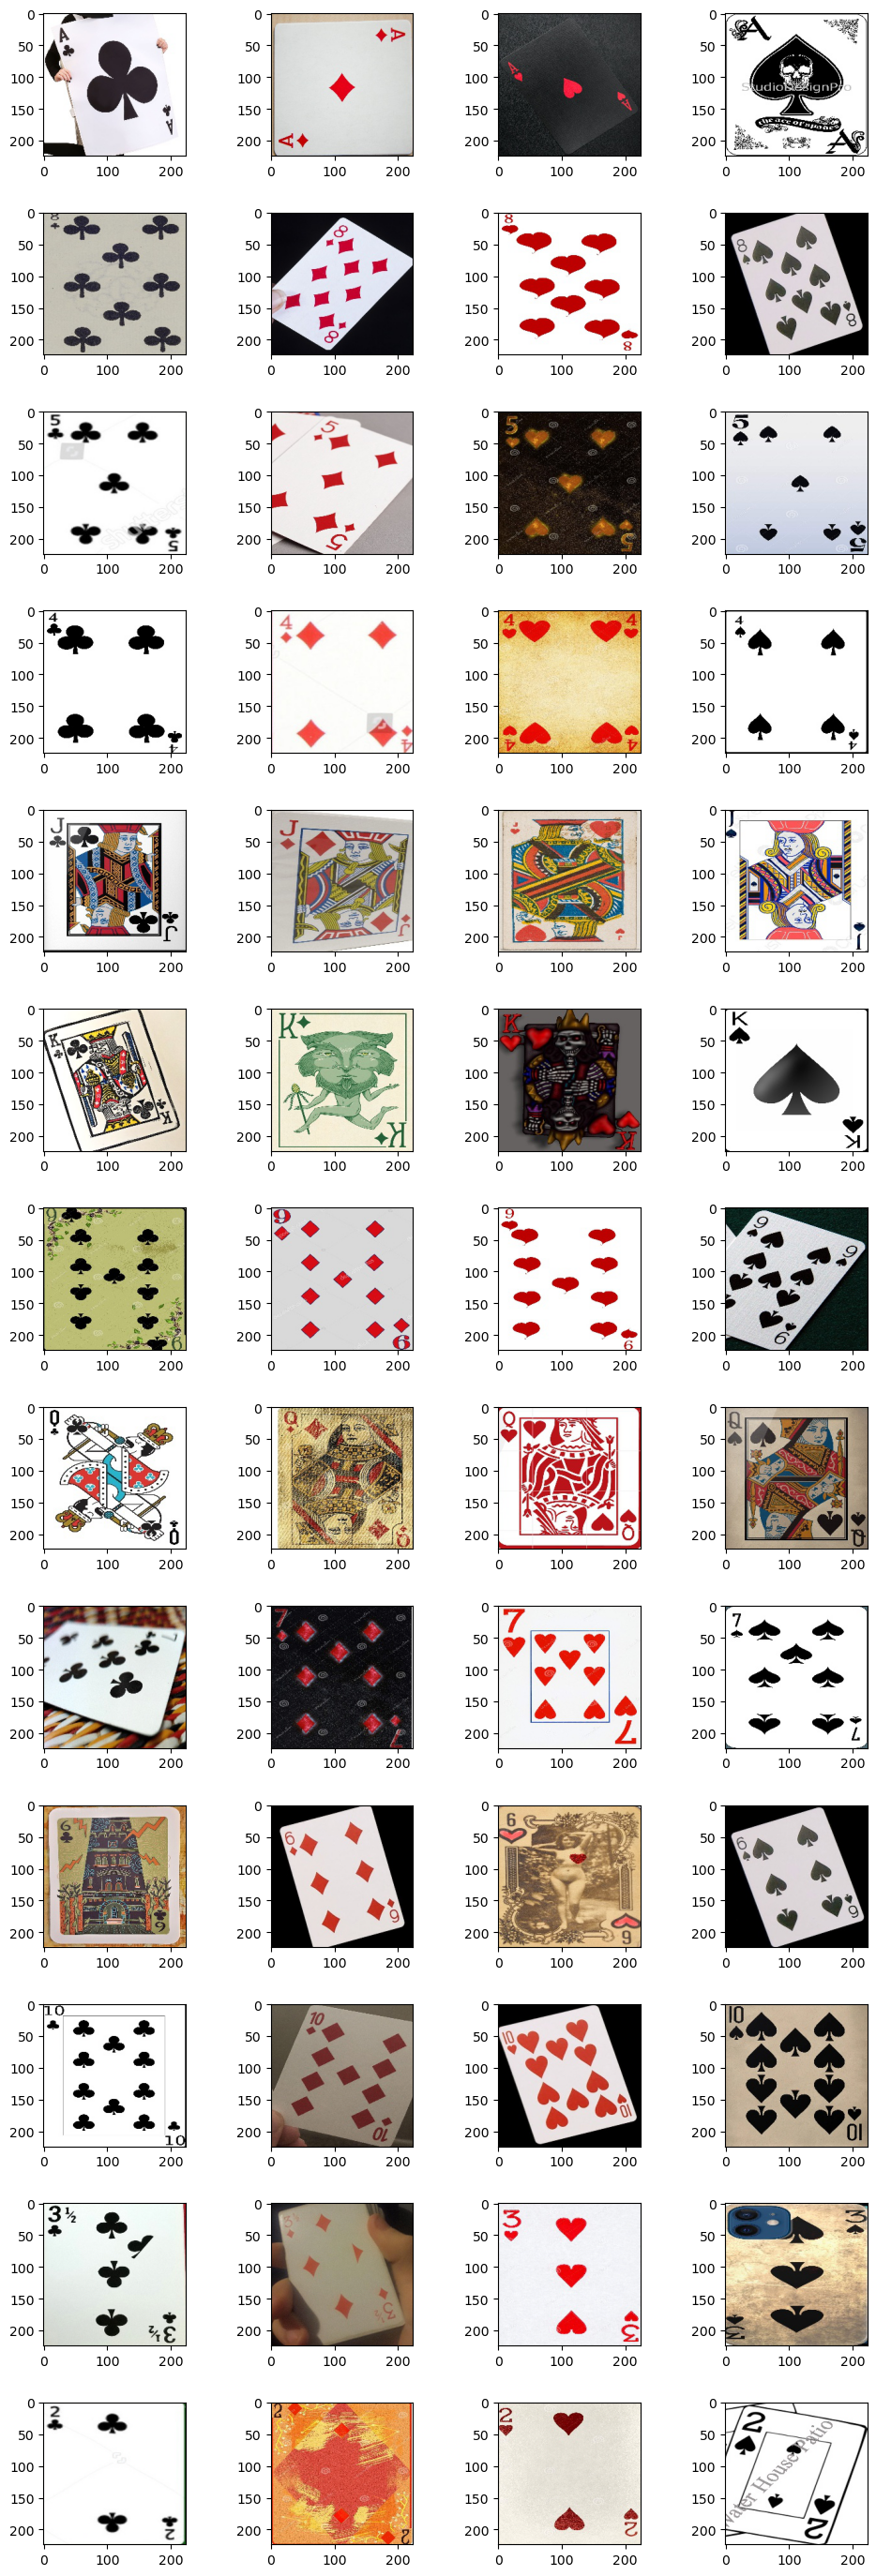

In [34]:
# Display all of the cards for each suite except Joker

plt.figure()
fig, ax = plt.subplots(13, 4, figsize = (10, 30))

for r in range(row):
    for c in range(col):
        img = plt.imread(suites[r][c])
        ax[r, c].imshow(img, cmap = 'gray')
        plt.subplots_adjust(left=0.1,
                            bottom=0.1,
                            right=1,
                            top= 1,
                            wspace=0.4,
                            hspace=0.4)
plt.show()

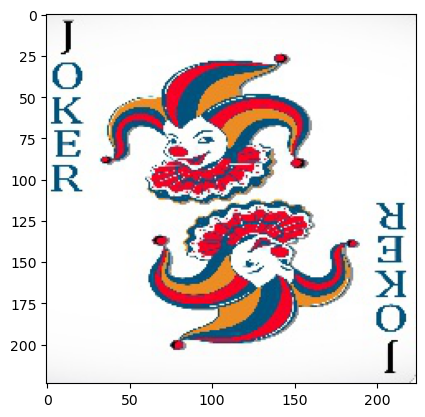

In [33]:
#display_joker

joker = plt.imread(joker[0])
plt.imshow(joker)
